In [1]:
# About the dataset

# Loading dataset

In [2]:
import os
import dask
import dask.dataframe as dd
import pandas as pd
import numpy as np
import datetime as dt
from glob import glob

import plotly.graph_objects as go
import chart_studio.plotly as py
import cufflinks as cf
import plotly.express as px

# set plotly+cufflinks in offline mode
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)
cf.go_offline(connected=True)
# SETTING THE THEME IN CUFFLINKS
cf.set_config_file(theme='pearl')


import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import jupyter_dash

In [5]:
from dask.distributed import Client
client=Client()
client

<Client: 'tcp://127.0.0.1:40053' processes=4 threads=4, memory=6.15 GiB>

## Checking the consistency in the names of the columns in the multiple csv files.

In [3]:
filenames=glob(os.path.join("Overwatch", "phs_*.csv"))
cols=['start_time', 'match_id', 'stage', 'map_type', 'map_name', 'player','team', 'stat_name', 'hero', 'stat_amount']
first = 'start_time,match_id,stage,map_type,map_name,player,team,stat_name,hero,stat_amount'
for file in filenames:
    df=pd.read_csv(file)
    if (df.columns!=cols).any():
        print(file,"\n",df.columns)
        sh.sed("-i", "1s/.*/" + first + "/", file)            

## Dataset

In [3]:
dataset=dd.read_csv(os.path.join("Overwatch", "phs_*.csv"), parse_dates=["start_time"]).sort_values("start_time").reset_index(drop=True)

In [43]:
#!pip3 install sh

     |████████████████████████████████| 40 kB 5.6 MB/s  eta 0:00:01


In [5]:
import sh

In [4]:
dataset.head()

start_time  match_id                       stage map_type map_name  \
0 2018-01-11 00:12:00     10223  Overwatch League - Stage 1  PAYLOAD   Dorado   
1 2018-01-11 00:12:00     10223  Overwatch League - Stage 1  PAYLOAD   Dorado   
2 2018-01-11 00:12:00     10223  Overwatch League - Stage 1  PAYLOAD   Dorado   
3 2018-01-11 00:12:00     10223  Overwatch League - Stage 1  PAYLOAD   Dorado   
4 2018-01-11 00:12:00     10223  Overwatch League - Stage 1  PAYLOAD   Dorado   

      player                 team                         stat_name  \
0  Agilities  Los Angeles Valiant                   All Damage Done   
1      Nevix  San Francisco Shock                       Shots Fired   
2      Nevix  San Francisco Shock                        Solo Kills   
3      Nevix  San Francisco Shock            Time Building Ultimate   
4      Nevix  San Francisco Shock  Time Elapsed per Ultimate Earned   

         hero   stat_amount  
0  All Heroes  18079.206920  
1  All Heroes  16081.000000  
2  All Heroes      3.000000  
3  All Heroes    632.506018  
4  All Heroes    126.501204

In [5]:
dataset.tail()

start_time  match_id     stage map_type   map_name player  \
344134 2021-06-07 00:10:28     37401  OWL 2021   HYBRID  Hollywood  Masaa   
344135 2021-06-07 00:10:28     37401  OWL 2021   HYBRID  Hollywood  Masaa   
344136 2021-06-07 00:10:28     37401  OWL 2021   HYBRID  Hollywood  Masaa   
344137 2021-06-07 00:10:28     37401  OWL 2021   HYBRID  Hollywood  Masaa   
344138 2021-06-07 00:10:28     37401  OWL 2021   HYBRID  Hollywood  super   

                       team             stat_name   hero  stat_amount  
344134        Atlanta Reign  Quick Melee Accuracy  Lúcio     0.166667  
344135        Atlanta Reign      Quick Melee Hits  Lúcio     1.000000  
344136        Atlanta Reign     Quick Melee Ticks  Lúcio     6.000000  
344137        Atlanta Reign      Healing Received  Mercy  1674.121271  
344138  San Francisco Shock       Weapon Accuracy  Orisa     0.412257

In [24]:
len(dataset.index.compute())

4325271

In [11]:
len(dataset.columns)

10

In [8]:
dataset.info()

<class 'dask.dataframe.core.DataFrame'>
Columns: 10 entries, start_time to stat_amount
dtypes: datetime64[ns](1), object(7), float64(1), int64(1)

# Dataset cleanning

In [9]:
dataset.isnull().sum().compute()

start_time     0
match_id       0
stage          0
map_type       0
map_name       0
player         0
team           0
stat_name      0
hero           0
stat_amount    0
dtype: int64

## The numbers of matches per stage

In [4]:
dataset.groupby([dataset.start_time.dt.to_period("M"), dataset.stage])['match_id'].nunique().compute().reset_index()

start_time                                           stage  match_id
0     2018-01                      Overwatch League - Stage 1        36
1     2018-02                      Overwatch League - Stage 1        24
2     2018-02      Overwatch League - Stage 1 - Title Matches         2
3     2018-02                      Overwatch League - Stage 2        12
4     2018-03                      Overwatch League - Stage 2        48
5     2018-03        Overwatch League - Stage 2 Title Matches         2
6     2018-04                      Overwatch League - Stage 3        48
7     2018-05                      Overwatch League - Stage 3        12
8     2018-05        Overwatch League - Stage 3 Title Matches         3
9     2018-05                      Overwatch League - Stage 4        28
10    2018-06                      Overwatch League - Stage 4        33
11    2018-06        Overwatch League - Stage 4 Title Matches         3
12    2018-07  Overwatch League Inaugural Season Championship        12
13    2019-02                        Overwatch League Stage 1        32
14    2019-03                        Overwatch League Stage 1        38
15    2019-03          Overwatch League Stage 1 Title Matches         7
16    2019-04                        Overwatch League Stage 2        56
17    2019-05                        Overwatch League Stage 2        14
18    2019-05          Overwatch League Stage 2 Title Matches         7
19    2019-06                        Overwatch League Stage 3        61
20    2019-07                        Overwatch League Stage 3         9
21    2019-07          Overwatch League Stage 3 Title Matches         7
22    2019-07                        Overwatch League Stage 4        16
23    2019-08                        Overwatch League Stage 4        54
24    2019-08               Overwatch League 2019 Post-Season         4
25    2019-09               Overwatch League 2019 Post-Season        15
26    2020-02                         OWL 2020 Regular Season        21
27    2020-03                         OWL 2020 Regular Season        21
28    2020-04                         OWL 2020 Regular Season        39
29    2020-05                         OWL 2020 Regular Season        52
30    2020-06                         OWL 2020 Regular Season        35
31    2020-07                         OWL 2020 Regular Season        45
32    2020-08                         OWL 2020 Regular Season        52
33    2020-09                         OWL 2020 Regular Season        26
34    2020-09                              OWL APAC All-Stars        12
35    2020-10                         OWL 2020 Regular Season         6
36    2020-10                     OWL North America All-Stars        10
37    2021-04                                        OWL 2021        34
38    2021-05                                        OWL 2021        44
39    2021-06                                        OWL 2021        20

## The numbers of teams per year

In [5]:
dataset.groupby([dataset.start_time.dt.to_period("Y")])['team'].nunique().compute().reset_index()

start_time  team
0       2018    12
1       2019    20
2       2020    49
3       2021    20

In [5]:
dataset[(dataset.stage!="OWL APAC All-Stars") & (dataset.stage!="OWL North America All-Stars")].groupby([dataset.start_time.dt.to_period("Y")])['team'].nunique().compute() #-->This fail

SyntaxError: invalid syntax (<ipython-input-5-057040e00645>, line 1)

Grouping by an unaligned index is unsafe and unsupported.
This can be caused by filtering only one of the object or grouping key. For example, the following works in pandas, but not in dask:
This can be avoided by either filtering beforehand, or passing in the name of the column instead:

>df2 = df[df.foo < 0]
df2.groupby(df2.bar)

or

>df[df.foo < 0].groupby('bar')

## The numbers of teams in regular OWL per year

In [4]:
df=dataset[(dataset.stage!="OWL APAC All-Stars") & (dataset.stage!="OWL North America All-Stars") & (dataset.hero!="All Heroes")]
team_num=df.groupby([df.start_time.dt.to_period("Y")])['team'].nunique().compute().reset_index()
team_num

start_time  team
0       2018    12
1       2019    20
2       2020    20
3       2021    20

In [195]:
df.head()

start_time  match_id                       stage map_type  \
9  2018-01-11 00:12:00     10223  Overwatch League - Stage 1  PAYLOAD   
11 2018-01-11 00:12:00     10223  Overwatch League - Stage 1  PAYLOAD   
12 2018-01-11 00:12:00     10223  Overwatch League - Stage 1  PAYLOAD   
13 2018-01-11 00:12:00     10223  Overwatch League - Stage 1  PAYLOAD   
14 2018-01-11 00:12:00     10223  Overwatch League - Stage 1  PAYLOAD   

   map_name player                 team              stat_name  hero  \
9    Dorado  Nevix  San Francisco Shock        All Damage Done  D.Va   
11   Dorado  Nevix  San Francisco Shock                Assists  D.Va   
12   Dorado  Nevix  San Francisco Shock  Critical Hit Accuracy  D.Va   
13   Dorado  Nevix  San Francisco Shock     Critical Hit Kills  D.Va   
14   Dorado  Nevix  San Francisco Shock          Critical Hits  D.Va   

     stat_amount  
9   14169.272380  
11     23.000000  
12      0.080707  
13      5.000000  
14    297.000000

# Data Analysis

## Hero Choice by Match

In [13]:
hero_choice=df.groupby([df.start_time.dt.to_period("Y"),df.hero]).match_id.nunique().compute().reset_index()

In [18]:
hero_choice.rename(columns={"match_id": "match_count"}, inplace=True)

In [19]:
hero_choice

start_time           hero  match_count
0         2018            Ana          197
1         2018        Bastion          104
2         2018           D.Va          262
3         2018       Doomfist          189
4         2018          Genji          258
..         ...            ...          ...
117       2021     Widowmaker           87
118       2021        Winston           95
119       2021  Wrecking Ball           98
120       2021          Zarya           71
121       2021       Zenyatta           41

[122 rows x 3 columns]

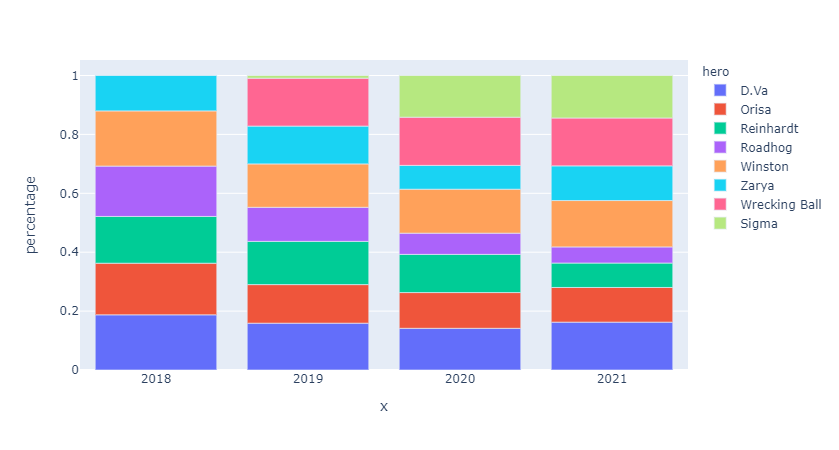

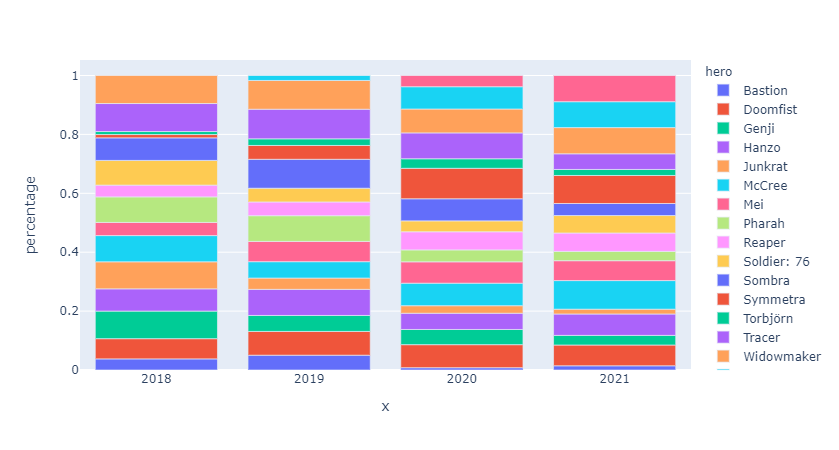

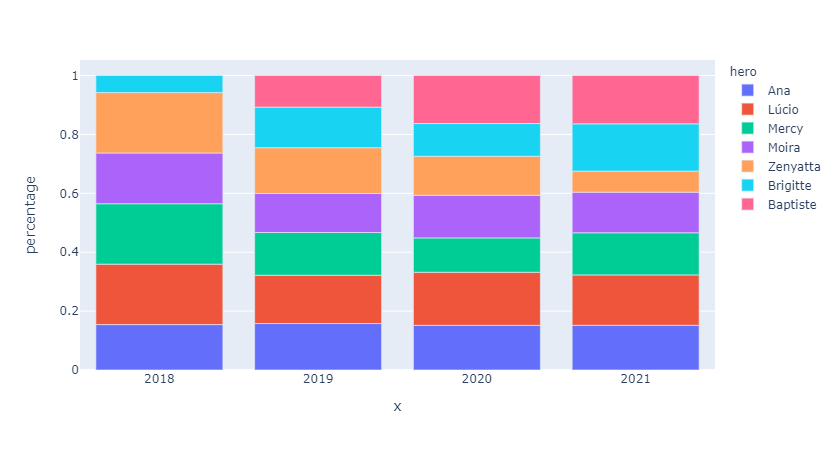

In [20]:
tank=["D.Va", "Orisa", "Reinhardt", "Roadhog", "Sigma", "Winston", "Wrecking Ball", "Zarya"]
dps=["Ashe", "Bastion", "Doomfist", "Echo", "Genji", "Hanzo", "Junkrat", "McCree", "Mei", "Pharah", "Reaper", "Soldier: 76", "Sombra", "Symmetra", "Torbjörn", "Tracer", "Widowmaker"]
healer=["Ana", "Baptiste", "Brigitte", "Lúcio", "Mercy","Moira", "Zenyatta"]

for i in [tank, dps, healer]:
    frame=hero_choice[hero_choice.hero.isin(i)]
    frame["percentage"]=0
    for j in frame.groupby("start_time").match_count.sum().index:
        frame.percentage[frame.start_time==j]=frame[frame.start_time==j].match_count/frame.groupby("start_time").match_count.sum()[j]
    fig=px.bar(frame, x=frame.start_time.astype(str), y="percentage", color="hero")
    fig.show()

## Hero Usage by Time Played: Hero Usage measures the percentage of total time that a hero was played

In [7]:
df_sub=df[df.stat_name=="Time Played"]
hero_timeplayed=df_sub.groupby([df_sub.start_time.dt.to_period("Y"), df_sub.hero]).stat_amount.sum().compute().reset_index()

In [421]:
hero_timeplayed["stat_amount"]=hero_timeplayed.stat_amount/360

In [8]:
hero_timeplayed

start_time           hero  stat_amount
0         2018            Ana   229.548563
1         2018        Bastion    53.072697
2         2018           D.Va  4250.152297
3         2018       Doomfist    47.088148
4         2018          Genji  1016.025925
..         ...            ...          ...
117       2021     Widowmaker   122.880752
118       2021        Winston   669.636581
119       2021  Wrecking Ball   253.374865
120       2021          Zarya   289.879864
121       2021       Zenyatta   160.018999

[122 rows x 3 columns]

In [8]:
hero_timeplayed["percentage"]=0
for i in hero_timeplayed.start_time.unique():
    hero_timeplayed.percentage[hero_timeplayed.start_time==i]=hero_timeplayed[hero_timeplayed.start_time==i].stat_amount/(hero_timeplayed.groupby("start_time").stat_amount.sum()[i]/6)

In [107]:
hero_timeplayed

start_time           hero   stat_amount  percentage
0         2018            Ana  8.263748e+04    0.049125
1         2018        Bastion  1.910617e+04    0.011358
2         2018           D.Va  1.530055e+06    0.909560
3         2018       Doomfist  1.695173e+04    0.010077
4         2018          Genji  3.657693e+05    0.217436
..         ...            ...           ...         ...
117       2021     Widowmaker  4.423707e+04    0.081856
118       2021        Winston  2.410692e+05    0.446071
119       2021  Wrecking Ball  9.121495e+04    0.168783
120       2021          Zarya  1.043568e+05    0.193100
121       2021       Zenyatta  5.760684e+04    0.106595

[122 rows x 4 columns]

In [9]:
tank=["D.Va", "Orisa", "Reinhardt", "Roadhog", "Sigma", "Winston", "Wrecking Ball", "Zarya"]
damage=["Ashe", "Bastion", "Doomfist", "Echo", "Genji", "Hanzo", "Junkrat", "McCree", "Mei", "Pharah", "Reaper", "Soldier: 76", "Sombra", "Symmetra", "Torbjörn", "Tracer", "Widowmaker"]
support=["Ana", "Baptiste", "Brigitte", "Lúcio", "Mercy","Moira", "Zenyatta"]
hero_timeplayed["role"]="Damage"
for i in hero_timeplayed.hero.unique():
    if i in tank:
        hero_timeplayed.loc[hero_timeplayed.hero==i,"role"]="Tank"
    if i in support:
        hero_timeplayed.loc[hero_timeplayed.hero==i,"role"]="Support"

In [217]:
hero_timeplayed

start_time           hero   stat_amount  percentage     role
0         2018            Ana  8.263748e+04    0.049125  Support
1         2018        Bastion  1.910617e+04    0.011358   Damage
2         2018           D.Va  1.530055e+06    0.909560     Tank
3         2018       Doomfist  1.695173e+04    0.010077   Damage
4         2018          Genji  3.657693e+05    0.217436   Damage
..         ...            ...           ...         ...      ...
117       2021     Widowmaker  4.423707e+04    0.081856   Damage
118       2021        Winston  2.410692e+05    0.446071     Tank
119       2021  Wrecking Ball  9.121495e+04    0.168783     Tank
120       2021          Zarya  1.043568e+05    0.193100     Tank
121       2021       Zenyatta  5.760684e+04    0.106595  Support

[122 rows x 5 columns]

In [10]:

app = jupyter_dash.JupyterDash(__name__)

app.layout = html.Div([
    html.Div([
        dcc.Dropdown(
            id="dropdown",
            options=[{"label": str(x), "value": str(x)} for x in hero_timeplayed.start_time.unique()],
            value=str(hero_timeplayed.start_time.unique()[0]),
            clearable=False),  
        dcc.RadioItems(
            id="herotype",
            options=[{"label": x, "value": x} for x in ["All", "Tank", "Damage", "Support"]],
            value="All")]),
        dcc.Graph(id="bar-chart"),
])
@app.callback(
    Output("bar-chart", "figure"), 
    Input("dropdown", "value"),
    Input("herotype", "value")) 
def figure_display(year, herotype): 
    frame=hero_timeplayed[hero_timeplayed.start_time==year].reset_index(drop=True)
    if herotype =="All":
        fig=px.bar(frame, x="hero", y="percentage", color="hero")
        fig.update_layout(yaxis=dict(tickformat=".0%"),xaxis={'categoryorder':'total descending'})
    else:
        fig=px.bar(frame[frame.role==herotype], x="hero", y="percentage", color="hero")
        fig.update_layout(yaxis=dict(tickformat=".0%"),xaxis={'categoryorder':'total descending'})
    return fig
    

if __name__ == '__main__':
    app.run_server(mode="inline",debug=True)

/home/phatdo/miniconda3/lib/python3.9/site-packages/jupyter_dash/jupyter_app.py:139: UserWarning:

The 'environ['werkzeug.server.shutdown']' function is deprecated and will be removed in Werkzeug 2.1.



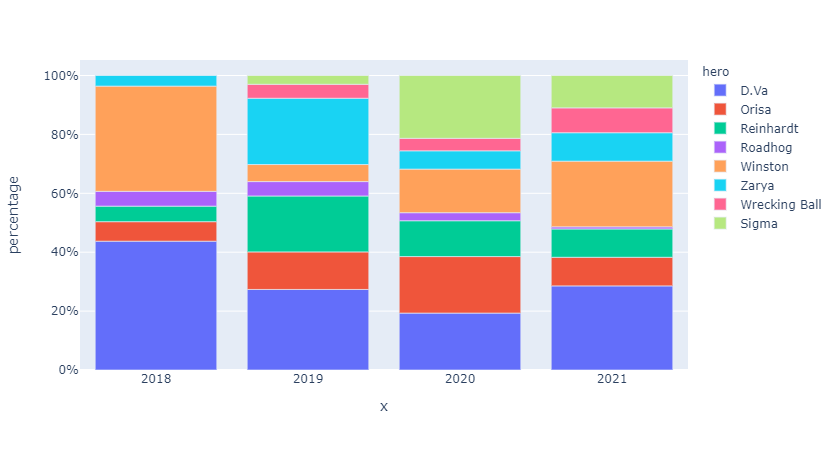

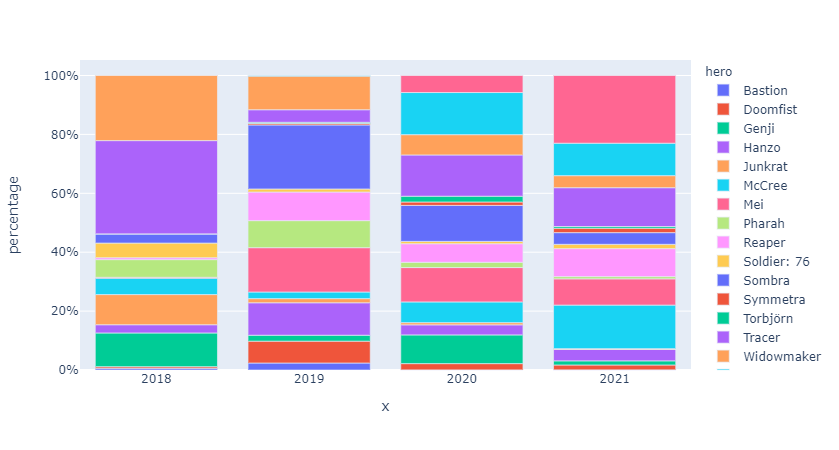

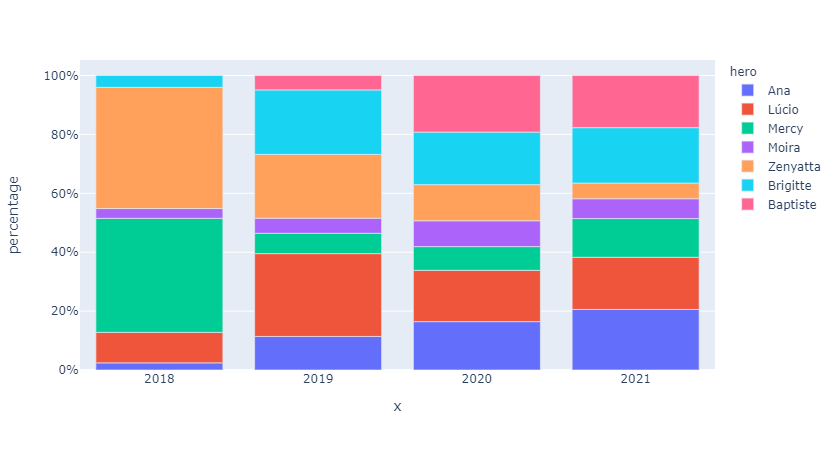

In [67]:
for i in [tank, damage, support]:
    frame=hero_timeplayed[hero_timeplayed.hero.isin(i)]
    frame["percentage"]=0
    for j in frame.groupby("start_time").stat_amount.sum().index:
        frame.percentage[frame.start_time==j]=frame[frame.start_time==j].stat_amount/frame.groupby("start_time").stat_amount.sum()[j]
    fig=px.bar(frame, x=frame.start_time.astype(str), y="percentage", color="hero")
    fig.update_layout(yaxis=dict(tickformat=".0%"))
    fig.show()

## Hero Choice by Map Type

In [21]:
hero_maptype=df.groupby([df.map_type, df.start_time.dt.to_period("Y"), df.hero]).match_id.nunique().compute().reset_index()

In [22]:
hero_maptype

map_type start_time      hero  match_id
0    ASSAULT       2018       Ana       120
1    ASSAULT       2018   Bastion        14
2    ASSAULT       2018      D.Va       256
3    ASSAULT       2018  Doomfist       101
4    ASSAULT       2018     Genji       229
..       ...        ...       ...       ...
483  CONTROL       2021     Orisa        33
484  CONTROL       2021   Roadhog         7
485   HYBRID       2021     Genji        16
486  PAYLOAD       2021   Bastion         2
487  PAYLOAD       2021  Torbjörn         4

[488 rows x 4 columns]

In [108]:
tank=["D.Va", "Orisa", "Reinhardt", "Roadhog", "Sigma", "Winston", "Wrecking Ball", "Zarya"]
dps=["Ashe", "Bastion", "Doomfist", "Echo", "Genji", "Hanzo", "Junkrat", "McCree", "Mei", "Pharah", "Reaper", "Soldier: 76", "Sombra", "Symmetra", "Torbjörn", "Tracer", "Widowmaker"]
healer=["Ana", "Baptiste", "Brigitte", "Lúcio", "Mercy","Moira", "Zenyatta"]


app = jupyter_dash.JupyterDash(__name__)

app.layout = html.Div([
    dcc.Dropdown(
        id="dropdown",
        options=[{"label": str(x), "value": str(x)} for x in hero_maptype.start_time.unique()],
        value=str(hero_maptype.start_time.unique()[0]),
        clearable=False),
    html.Div([    
        dcc.Graph(id="tank"),
        dcc.Graph(id="dps"),
        dcc.Graph(id="healer"),
    ])
])

@app.callback(
    Output("tank", "figure"), 
    Output("dps", "figure"),
    Output("healer", "figure"),
    [Input("dropdown", "value")])
def figure_display(year): 
    fig_list=[]
    frame= hero_maptype[hero_maptype.start_time==year]
    for i in [tank, dps, healer]:
        f=frame[frame.hero.isin(i)]
        f["percentage"]=0
        for j in  hero_maptype.map_type.unique():
            f.percentage[f.map_type==j]=f[f.map_type==j].match_id/f.groupby("map_type").match_id.sum()[j]
        fig=px.bar(f, x="map_type", y="percentage", color="hero")
        fig_list.append(fig)
    return fig_list


if __name__ == '__main__':
    app.run_server(mode="inline",debug=True)

## Hero Choice by Time played per Map 

In [11]:
hero_maptime=df_sub.groupby([df_sub.map_type, df_sub.start_time.dt.to_period("Y"), df_sub.hero]).stat_amount.sum().compute().reset_index()

In [13]:
hero_maptime["percentage"]=0

In [237]:
hero_maptime.head()

map_type start_time      hero    stat_amount  percentage
0  ASSAULT       2018       Ana   39129.290387           0
1  ASSAULT       2018   Bastion     499.322358           0
2  ASSAULT       2018      D.Va  392006.418896           0
3  ASSAULT       2018  Doomfist    4094.119334           0
4  ASSAULT       2018     Genji  130214.936540           0

In [234]:
hero_maptime.percentage[(hero_maptime.start_time=="2018")& (hero_maptime.map_type=="ASSAULT")]

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
98     0
101    0
102    0
Name: percentage, dtype: int64

In [235]:
hero_maptime.groupby(["start_time", "map_type"]).stat_amount.sum()

start_time  map_type
2018        ASSAULT     2.437441e+06
            CONTROL     2.427507e+06
            HYBRID      2.488701e+06
            PAYLOAD     2.739501e+06
2019        ASSAULT     3.049898e+06
            CONTROL     2.997135e+06
            HYBRID      3.261904e+06
            PAYLOAD     3.279915e+06
2020        ASSAULT     2.230225e+06
            CONTROL     2.805459e+06
            HYBRID      2.669681e+06
            PAYLOAD     2.185000e+06
2021        ASSAULT     7.598582e+05
            CONTROL     8.631816e+05
            HYBRID      8.352162e+05
            PAYLOAD     7.843098e+05
Name: stat_amount, dtype: float64

In [241]:
hero_maptime[(hero_maptime.start_time=="2018")&(hero_maptime.map_type=="ASSAULT")].stat_amount

0       39129.290387
1         499.322358
2      392006.418896
3        4094.119334
4      130214.936540
5        6624.962531
6       88000.346699
7       73555.300878
8       20983.379551
9        4352.919848
10     300057.224026
11      21357.384519
12      51873.042525
13       5601.295552
14       7922.108724
15      21501.000920
16      19491.394369
17      40448.158430
18      39203.311928
19     284208.771478
20     154175.017843
21     331538.983229
22      11844.278852
23     352234.045503
98         19.239492
101     36476.715757
102        28.245802
Name: stat_amount, dtype: float64

In [14]:
for i in hero_maptime.start_time.unique():
    for j in hero_maptime.map_type.unique():
        hero_maptime.percentage[(hero_maptime.start_time==i)&(hero_maptime.map_type==j)]=hero_maptime[(hero_maptime.start_time==i)&(hero_maptime.map_type==j)].stat_amount/(hero_maptime.groupby(["start_time", "map_type"]).stat_amount.sum()[i,j]/6)

In [15]:
tank=["D.Va", "Orisa", "Reinhardt", "Roadhog", "Sigma", "Winston", "Wrecking Ball", "Zarya"]
damage=["Ashe", "Bastion", "Doomfist", "Echo", "Genji", "Hanzo", "Junkrat", "McCree", "Mei", "Pharah", "Reaper", "Soldier: 76", "Sombra", "Symmetra", "Torbjörn", "Tracer", "Widowmaker"]
support=["Ana", "Baptiste", "Brigitte", "Lúcio", "Mercy","Moira", "Zenyatta"]
hero_maptime["role"]="Damage"
for i in hero_maptime.hero.unique():
    if i in tank:
        hero_maptime.loc[hero_maptime.hero==i,"role"]="Tank"
    if i in support:
        hero_maptime.loc[hero_maptime.hero==i,"role"]="Support"

In [17]:
hero_maptime.head(30)

map_type start_time         hero    stat_amount  percentage     role
0   ASSAULT       2018          Ana   39129.290387    0.096321  Support
1   ASSAULT       2018      Bastion     499.322358    0.001229   Damage
2   ASSAULT       2018         D.Va  392006.418896    0.964962     Tank
3   ASSAULT       2018     Doomfist    4094.119334    0.010078   Damage
4   ASSAULT       2018        Genji  130214.936540    0.320537   Damage
5   ASSAULT       2018        Hanzo    6624.962531    0.016308   Damage
6   ASSAULT       2018      Junkrat   88000.346699    0.216621   Damage
7   ASSAULT       2018        Lúcio   73555.300878    0.181064  Support
8   ASSAULT       2018       McCree   20983.379551    0.051653   Damage
9   ASSAULT       2018          Mei    4352.919848    0.010715   Damage
10  ASSAULT       2018        Mercy  300057.224026    0.738620  Support
11  ASSAULT       2018        Moira   21357.384519    0.052573  Support
12  ASSAULT       2018        Orisa   51873.042525    0.127691     Tank
13  ASSAULT       2018       Pharah    5601.295552    0.013788   Damage
14  ASSAULT       2018       Reaper    7922.108724    0.019501   Damage
15  ASSAULT       2018    Reinhardt   21501.000920    0.052927     Tank
16  ASSAULT       2018      Roadhog   19491.394369    0.047980     Tank
17  ASSAULT       2018  Soldier: 76   40448.158430    0.099567   Damage
18  ASSAULT       2018       Sombra   39203.311928    0.096503   Damage
19  ASSAULT       2018       Tracer  284208.771478    0.699608   Damage
20  ASSAULT       2018   Widowmaker  154175.017843    0.379517   Damage
21  ASSAULT       2018      Winston  331538.983229    0.816116     Tank
22  ASSAULT       2018        Zarya   11844.278852    0.029156     Tank
23  ASSAULT       2018     Zenyatta  352234.045503    0.867059  Support
24  CONTROL       2018          Ana    2138.437557    0.005286  Support
25  CONTROL       2018      Bastion     441.838862    0.001092   Damage
26  CONTROL       2018         D.Va  345672.021419    0.854388     Tank
27  CONTROL       2018     Doomfist    4388.849051    0.010848   Damage
28  CONTROL       2018        Genji   50347.537745    0.124443   Damage
29  CONTROL       2018      Junkrat   59452.463211    0.146947   Damage

In [18]:
#external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']


app = jupyter_dash.JupyterDash(__name__)

app.layout = html.Div([
    html.Div([
        dcc.Dropdown(
            id="dropdown",
            options=[{"label": str(x), "value": str(x)} for x in hero_timeplayed.start_time.unique()],
            value=str(hero_timeplayed.start_time.unique()[0]),
            clearable=False),
        html.Label("Hero Type"),
        dcc.RadioItems(
            id="herotype",
            options=[{"label": x, "value": x} for x in ["All", "Tank", "Damage", "Support"]],
            value="All"),
        html.Label("Map Type"),
        dcc.RadioItems(
            id="maptype",
            options=[{"label": x, "value": x} for x in ["All", "ASSAULT", "CONTROL", "HYBRID", "PAYLOAD"]],
            value="All")]),
        dcc.Graph(id="bar-chart"),
])
@app.callback(
    Output("bar-chart", "figure"), 
    Input("dropdown", "value"),
    Input("herotype", "value"),
    Input("maptype", "value")) 


def figure_display(year, herotype, maptype): 
#     frame=hero_timeplayed[hero_timeplayed.start_time==year].reset_index(drop=True)
#     frame1=hero_maptime[hero_maptime.start_time==year].reset_index(drop=True)
    if maptype=="All":
        frame=hero_timeplayed[hero_timeplayed.start_time==year].reset_index(drop=True)
        if herotype =="All":
            fig=px.bar(frame, x="hero", y="percentage", color="hero")
            fig.update_layout(yaxis=dict(tickformat=".0%"),xaxis={'categoryorder':'total descending'}, font_family="Arial")
        else:
            fig=px.bar(frame[frame.role==herotype], x="hero", y="percentage", color="hero")
            fig.update_layout(yaxis=dict(tickformat=".0%"),xaxis={'categoryorder':'total descending'}, font_family="Arial")
    else:
        frame=hero_maptime[hero_maptime.start_time==year].reset_index(drop=True)
        if herotype=="All":
            fig=px.bar(frame[frame.map_type==maptype], x="hero", y="percentage", color="hero")
            fig.update_layout(yaxis=dict(tickformat=".0%"),xaxis={'categoryorder':'total descending'}, font_family="Arial")
        else:
            fig=px.bar(frame[(frame.map_type==maptype)&(frame.role==herotype)], x="hero", y="percentage", color="hero")
            fig.update_layout(yaxis=dict(tickformat=".0%"),xaxis={'categoryorder':'total descending'}, font_family="Arial")
    return fig
    

if __name__ == '__main__':
    app.run_server(mode="inline",debug=True)

/home/phatdo/miniconda3/lib/python3.9/site-packages/jupyter_dash/jupyter_app.py:139: UserWarning:

The 'environ['werkzeug.server.shutdown']' function is deprecated and will be removed in Werkzeug 2.1.



In [ ]:
Because any hero can be played by two teams at the same time, if a hero had a usage percentage over 50%, it can be concluded that this hero was at least picked by one team in any game on average 

In [27]:
df_sub.head()

start_time  match_id                       stage map_type  \
31  2018-01-11 00:12:00     10223  Overwatch League - Stage 1  PAYLOAD   
72  2018-01-11 00:12:00     10223  Overwatch League - Stage 1  PAYLOAD   
109 2018-01-11 00:12:00     10223  Overwatch League - Stage 1  PAYLOAD   
193 2018-01-11 00:12:00     10223  Overwatch League - Stage 1  PAYLOAD   
201 2018-01-11 00:12:00     10223  Overwatch League - Stage 1  PAYLOAD   

    map_name  player                 team    stat_name     hero  stat_amount  
31    Dorado  Danteh  San Francisco Shock  Time Played   Tracer   366.174063  
72    Dorado   Nevix  San Francisco Shock  Time Played     D.Va   836.332770  
109   Dorado  Danteh  San Francisco Shock  Time Played    Genji   150.873136  
193   Dorado  Danteh  San Francisco Shock  Time Played  Junkrat   319.285571  
201   Dorado    dhaK  San Francisco Shock  Time Played    Mercy   836.332770

In [44]:
df_sub[df_sub.start_time.dt.to_period("Y")=="2019"].compute()

start_time  match_id                              stage  \
212471 2019-02-15 00:11:00     21211           Overwatch League Stage 1   
212526 2019-02-15 00:11:00     21211           Overwatch League Stage 1   
212622 2019-02-15 00:11:00     21211           Overwatch League Stage 1   
212643 2019-02-15 00:11:00     21211           Overwatch League Stage 1   
212705 2019-02-15 00:11:00     21211           Overwatch League Stage 1   
...                    ...       ...                                ...   
245920 2019-09-29 20:47:00     30157  Overwatch League 2019 Post-Season   
245938 2019-09-29 20:47:00     30157  Overwatch League 2019 Post-Season   
246008 2019-09-29 20:47:00     30157  Overwatch League 2019 Post-Season   
246015 2019-09-29 20:47:00     30157  Overwatch League 2019 Post-Season   
246023 2019-09-29 20:47:00     30157  Overwatch League 2019 Post-Season   

       map_type               map_name   player                 team  \
212471  CONTROL                  Ilios     Poko  Philadelphia Fusion   
212526  CONTROL                  Ilios     SADO  Philadelphia Fusion   
212622  CONTROL                  Ilios   Profit      London Spitfire   
212643  CONTROL                  Ilios   Profit      London Spitfire   
212705  CONTROL                  Ilios  Boombox  Philadelphia Fusion   
...         ...                    ...      ...                  ...   
245920  PAYLOAD  Watchpoint: Gibraltar     moth  San Francisco Shock   
245938  PAYLOAD  Watchpoint: Gibraltar     moth  San Francisco Shock   
246008  PAYLOAD  Watchpoint: Gibraltar   Viol2t  San Francisco Shock   
246015  PAYLOAD  Watchpoint: Gibraltar   Viol2t  San Francisco Shock   
246023  PAYLOAD  Watchpoint: Gibraltar   Viol2t  San Francisco Shock   

          stat_name       hero  stat_amount  
212471  Time Played       D.Va   655.895890  
212526  Time Played  Reinhardt   224.786749  
212622  Time Played   Brigitte   588.733318  
212643  Time Played      Hanzo    67.162571  
212705  Time Played   Zenyatta   655.895890  
...             ...        ...          ...  
245920  Time Played   Baptiste   536.386783  
245938  Time Played      Lúcio    16.547847  
246008  Time Played        Ana   212.194698  
246015  Time Played   Baptiste   320.192658  
246023  Time Played      Moira   333.932273  

[33125 rows x 10 columns]

In [104]:
tank=["D.Va", "Orisa", "Reinhardt", "Roadhog", "Sigma", "Winston", "Wrecking Ball", "Zarya"]
damage=["Ashe", "Bastion", "Doomfist", "Echo", "Genji", "Hanzo", "Junkrat", "McCree", "Mei", "Pharah", "Reaper", "Soldier: 76", "Sombra", "Symmetra", "Torbjörn", "Tracer", "Widowmaker"]
support=["Ana", "Baptiste", "Brigitte", "Lúcio", "Mercy","Moira", "Zenyatta"]
df_sub["role"]="Damage"
df_sub["role"]=df_sub["role"].where(~df_sub["hero"].isin(tank),"Tank")
df_sub["role"]=df_sub["role"].where(~df_sub["hero"].isin(support),"Support")

In [106]:
df_sub.head()

start_time  match_id                       stage map_type  \
31  2018-01-11 00:12:00     10223  Overwatch League - Stage 1  PAYLOAD   
72  2018-01-11 00:12:00     10223  Overwatch League - Stage 1  PAYLOAD   
109 2018-01-11 00:12:00     10223  Overwatch League - Stage 1  PAYLOAD   
193 2018-01-11 00:12:00     10223  Overwatch League - Stage 1  PAYLOAD   
201 2018-01-11 00:12:00     10223  Overwatch League - Stage 1  PAYLOAD   

    map_name  player                 team    stat_name     hero  stat_amount  \
31    Dorado  Danteh  San Francisco Shock  Time Played   Tracer   366.174063   
72    Dorado   Nevix  San Francisco Shock  Time Played     D.Va   836.332770   
109   Dorado  Danteh  San Francisco Shock  Time Played    Genji   150.873136   
193   Dorado  Danteh  San Francisco Shock  Time Played  Junkrat   319.285571   
201   Dorado    dhaK  San Francisco Shock  Time Played    Mercy   836.332770   

        role  
31    Damage  
72      Tank  
109   Damage  
193   Damage  
201  Support

In [113]:
frame1=df_sub[df_sub.start_time.dt.to_period("Y")=="2018"].compute().reset_index(drop=True)

In [114]:
frame1

start_time  match_id  \
0     2018-01-11 00:12:00     10223   
1     2018-01-11 00:12:00     10223   
2     2018-01-11 00:12:00     10223   
3     2018-01-11 00:12:00     10223   
4     2018-01-11 00:12:00     10223   
...                   ...       ...   
25998 2018-07-28 21:18:00     13134   
25999 2018-07-28 21:18:00     13134   
26000 2018-07-28 21:18:00     13134   
26001 2018-07-28 21:18:00     13134   
26002 2018-07-28 21:18:00     13134   

                                                stage map_type    map_name  \
0                          Overwatch League - Stage 1  PAYLOAD      Dorado   
1                          Overwatch League - Stage 1  PAYLOAD      Dorado   
2                          Overwatch League - Stage 1  PAYLOAD      Dorado   
3                          Overwatch League - Stage 1  PAYLOAD      Dorado   
4                          Overwatch League - Stage 1  PAYLOAD      Dorado   
...                                               ...      ...         ...   
25998  Overwatch League Inaugural Season Championship   HYBRID  King's Row   
25999  Overwatch League Inaugural Season Championship   HYBRID  King's Row   
26000  Overwatch League Inaugural Season Championship   HYBRID  King's Row   
26001  Overwatch League Inaugural Season Championship   HYBRID  King's Row   
26002  Overwatch League Inaugural Season Championship   HYBRID  King's Row   

        player                 team    stat_name       hero  stat_amount  \
0       Danteh  San Francisco Shock  Time Played     Tracer   366.174063   
1        Nevix  San Francisco Shock  Time Played       D.Va   836.332770   
2       Danteh  San Francisco Shock  Time Played      Genji   150.873136   
3       Danteh  San Francisco Shock  Time Played    Junkrat   319.285571   
4         dhaK  San Francisco Shock  Time Played      Mercy   836.332770   
...        ...                  ...          ...        ...          ...   
25998  Gesture      London Spitfire  Time Played      Orisa   248.205612   
25999  Gesture      London Spitfire  Time Played  Reinhardt   314.392668   
26000  Gesture      London Spitfire  Time Played   Doomfist     1.953511   
26001      NUS      London Spitfire  Time Played        Ana     5.846040   
26002  Gesture      London Spitfire  Time Played    Winston   427.281109   

          role  
0       Damage  
1         Tank  
2       Damage  
3       Damage  
4      Support  
...        ...  
25998     Tank  
25999     Tank  
26000   Damage  
26001  Support  
26002     Tank  

[26003 rows x 11 columns]

In [118]:
app = jupyter_dash.JupyterDash(__name__)

app.layout = html.Div([
    html.Div([
        dcc.Dropdown(
            id="dropdown",
            options=[{"label": str(x), "value": str(x)} for x in hero_timeplayed.start_time.unique()],
            value=str(hero_timeplayed.start_time.unique()[0]),
            clearable=False),
        html.Label("Hero Type"),
        dcc.RadioItems(
            id="herotype",
            options=[{"label": x, "value": x} for x in ["All", "Tank", "Damage", "Support"]],
            value="All"),
        html.Label("Map Type"),
        dcc.RadioItems(
            id="maptype",
            options=[{"label": x, "value": x} for x in ["All", "ASSAULT", "CONTROL", "HYBRID", "PAYLOAD"]],
            value="All")]),
        html.Div([
            dcc.Graph(id="bar-chart"),
            dcc.Graph(id="box-plot")
    ])
])
@app.callback(
    Output("bar-chart", "figure"),
    Output("box-plot", "figure"),
    Input("dropdown", "value"),
    Input("herotype", "value"),
    Input("maptype", "value")) 

def figure_display(year, herotype, maptype):
    graph=[]
    if maptype=="All":
        frame=hero_timeplayed[hero_timeplayed.start_time==year].reset_index(drop=True)
        frame1=df_sub[df_sub.start_time.dt.to_period("Y")==year].compute().reset_index(drop=True)
        if herotype =="All":
            fig=px.bar(frame, x="hero", y="percentage", color="hero")
            fig.update_layout(yaxis=dict(tickformat=".0%"),xaxis={'categoryorder':'total descending'}, font_family="Arial")
            fig1=px.box(frame1, x=frame1.hero, y=frame1.stat_amount/60)
            graph.append(fig, fig1)
            #graph.append(fig1)
        else:
            fig=px.bar(frame[frame.role==herotype], x="hero", y="percentage", color="hero")
            fig.update_layout(yaxis=dict(tickformat=".0%"),xaxis={'categoryorder':'total descending'}, font_family="Arial")
    else:
        frame=hero_maptime[hero_maptime.start_time==year].reset_index(drop=True)
        if herotype=="All":
            fig=px.bar(frame[frame.map_type==maptype], x="hero", y="percentage", color="hero")
            fig.update_layout(yaxis=dict(tickformat=".0%"),xaxis={'categoryorder':'total descending'}, font_family="Arial")
        else:
            fig=px.bar(frame[(frame.map_type==maptype)&(frame.role==herotype)], x="hero", y="percentage", color="hero")
            fig.update_layout(yaxis=dict(tickformat=".0%"),xaxis={'categoryorder':'total descending'}, font_family="Arial")
    return graph
    

if __name__ == '__main__':
    app.run_server(mode="inline",debug=True)

/home/phatdo/miniconda3/lib/python3.9/site-packages/jupyter_dash/jupyter_app.py:139: UserWarning:

The 'environ['werkzeug.server.shutdown']' function is deprecated and will be removed in Werkzeug 2.1.



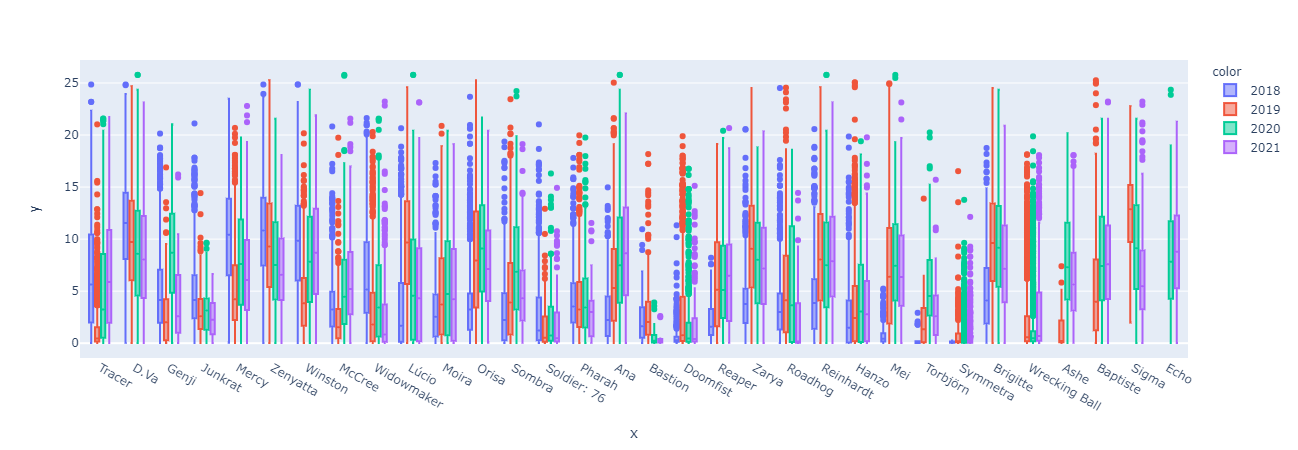

In [36]:
px.box(df_sub, x=df_sub.hero, y=df_sub.stat_amount/60, color=df_sub.start_time.dt.to_period("Y").compute())

In [30]:
tank=["D.Va", "Orisa", "Reinhardt", "Roadhog", "Sigma", "Winston", "Wrecking Ball", "Zarya"]
dps=["Ashe", "Bastion", "Doomfist", "Echo", "Genji", "Hanzo", "Junkrat", "McCree", "Mei", "Pharah", "Reaper", "Soldier: 76", "Sombra", "Symmetra", "Torbjörn", "Tracer", "Widowmaker"]
healer=["Ana", "Baptiste", "Brigitte", "Lúcio", "Mercy","Moira", "Zenyatta"]


app = jupyter_dash.JupyterDash(__name__)

app.layout = html.Div([
    dcc.Dropdown(
        id="dropdown",
        options=[{"label": str(x), "value": str(x)} for x in hero_maptime.start_time.unique()],
        value=str(hero_maptime.start_time.unique()[0]),
        clearable=False),
    html.Div([    
        dcc.Graph(id="tank"),
        dcc.Graph(id="dps"),
        dcc.Graph(id="healer"),
    ])
])

@app.callback(
    Output("tank", "figure"), 
    Output("dps", "figure"),
    Output("healer", "figure"),
    [Input("dropdown", "value")])
def figure_display(year): 
    fig_list=[]
    frame=hero_maptime[hero_maptime.start_time==year]
    for i in [tank, dps, healer]:
        f=frame[frame.hero.isin(i)]
        f["percentage"]=0
        for j in hero_maptime.map_type.unique():
            f.percentage[f.map_type==j]=f[f.map_type==j].stat_amount/f.groupby("map_type").stat_amount.sum()[j]
        fig=px.bar(f, x="map_type", y="percentage", color="hero")
        fig_list.append(fig)
    return fig_list


if __name__ == '__main__':
    app.run_server(mode="inline",debug=True)

## Hero Performance

In [47]:
df1=df_sub.groupby([df_sub.start_time,"match_id", "map_type","map_name", "team"]).hero.unique().compute().reset_index()

In [42]:
df1.head()

start_time  match_id map_type          map_name  \
0 2018-01-11 00:12:00     10223  PAYLOAD            Dorado   
1 2018-01-11 00:12:00     10223  PAYLOAD            Dorado   
2 2018-01-11 00:34:00     10223  ASSAULT  Temple of Anubis   
3 2018-01-11 00:34:00     10223  ASSAULT  Temple of Anubis   
4 2018-01-11 01:11:00     10223  CONTROL             Ilios   

                  team                                               hero  
0  Los Angeles Valiant  [D.Va, Winston, Genji, Widowmaker, Zenyatta, M...  
1  San Francisco Shock  [Tracer, D.Va, Genji, Junkrat, Mercy, Zenyatta...  
2  Los Angeles Valiant  [Zenyatta, Tracer, D.Va, Genji, Orisa, Junkrat...  
3  San Francisco Shock  [D.Va, Winston, Tracer, Mercy, Lúcio, Zenyatta...  
4  Los Angeles Valiant  [Zenyatta, Lúcio, Winston, Mercy, D.Va, Soldie...

In [48]:
result=pd.read_csv("./Overwatch/match_map_stats.csv", parse_dates=["round_start_time"])

In [44]:
result.head()

round_start_time       round_end_time                       stage  \
0 2018-01-11 00:12:07  2018-01-11 00:20:07  Overwatch League - Stage 1   
1 2018-01-11 00:22:05  2018-01-11 00:27:59  Overwatch League - Stage 1   
2 2018-01-11 00:34:39  2018-01-11 00:38:29  Overwatch League - Stage 1   
3 2018-01-11 00:40:27  2018-01-11 00:44:41  Overwatch League - Stage 1   
4 2018-01-11 00:46:09  2018-01-11 00:49:48  Overwatch League - Stage 1   

   match_id  game_number         match_winner           map_winner  \
0     10223            1  Los Angeles Valiant  Los Angeles Valiant   
1     10223            1  Los Angeles Valiant  Los Angeles Valiant   
2     10223            2  Los Angeles Valiant  Los Angeles Valiant   
3     10223            2  Los Angeles Valiant  Los Angeles Valiant   
4     10223            2  Los Angeles Valiant  Los Angeles Valiant   

             map_loser          map_name  map_round  ...        team_one_name  \
0  San Francisco Shock            Dorado          1  ...  Los Angeles Valiant   
1  San Francisco Shock            Dorado          2  ...  Los Angeles Valiant   
2  San Francisco Shock  Temple of Anubis          1  ...  Los Angeles Valiant   
3  San Francisco Shock  Temple of Anubis          2  ...  Los Angeles Valiant   
4  San Francisco Shock  Temple of Anubis          3  ...  Los Angeles Valiant   

         team_two_name attacker_payload_distance defender_payload_distance  \
0  San Francisco Shock                 75.615051                  0.000000   
1  San Francisco Shock                 75.649597                 75.615051   
2  San Francisco Shock                  0.000000                  0.000000   
3  San Francisco Shock                  0.000000                  0.000000   
4  San Francisco Shock                  0.000000                  0.000000   

   attacker_time_banked  defender_time_banked  attacker_control_perecent  \
0              0.000000            240.000000                        NaN   
1            125.750572              0.000000                        NaN   
2            250.492004            240.000000                        NaN   
3            225.789032            250.492004                        NaN   
4             36.396057            250.492004                        NaN   

   defender_control_perecent  attacker_round_end_score  \
0                        NaN                         2   
1                        NaN                         3   
2                        NaN                         2   
3                        NaN                         2   
4                        NaN                         4   

   defender_round_end_score  
0                         0  
1                         2  
2                         0  
3                         2  
4                         2  

[5 rows x 25 columns]

In [49]:
a=result.drop_duplicates(subset=["match_id", 'game_number'])
a=a[(a.stage!="OWL APAC All-Stars") & (a.stage!="OWL North America All-Stars")]

In [50]:
b=a[["match_id","game_number","map_name","map_winner","map_loser","round_start_time"]]
b.reset_index(inplace=True, drop=True)
b

match_id  game_number          map_name              map_winner  \
0        10223            1            Dorado     Los Angeles Valiant   
1        10223            2  Temple of Anubis     Los Angeles Valiant   
2        10223            3             Ilios     Los Angeles Valiant   
3        10223            4           Numbani     Los Angeles Valiant   
4        10224            1            Dorado  Los Angeles Gladiators   
...        ...          ...               ...                     ...   
3988     37402            3         Hollywood  Los Angeles Gladiators   
3989     37402            4        Junkertown             Dallas Fuel   
3990     37401            1             Nepal           Atlanta Reign   
3991     37401            2          Hanamura           Atlanta Reign   
3992     37401            3         Hollywood           Atlanta Reign   

                   map_loser    round_start_time  
0        San Francisco Shock 2018-01-11 00:12:07  
1        San Francisco Shock 2018-01-11 00:34:39  
2        San Francisco Shock 2018-01-11 01:11:32  
3        San Francisco Shock 2018-01-11 01:32:26  
4           Shanghai Dragons 2018-01-11 02:08:49  
...                      ...                 ...  
3988             Dallas Fuel 2021-06-06 22:35:47  
3989  Los Angeles Gladiators 2021-06-06 22:51:06  
3990     San Francisco Shock 2021-06-06 23:34:45  
3991     San Francisco Shock 2021-06-06 23:51:42  
3992     San Francisco Shock 2021-06-07 00:10:26  

[3993 rows x 6 columns]

In [51]:
b["result"]="victory"

In [337]:
draw=b[b.map_winner=="draw"]
draw["result"]="draw"

In [338]:
draw.head()

match_id  game_number              map_name map_winner map_loser  \
11      10225            4               Numbani       draw      draw   
26      10229            2  Horizon Lunar Colony       draw      draw   
52      10235            4           Eichenwalde       draw      draw   
68      10239            4               Numbani       draw      draw   
137     10255            1           Eichenwalde       draw      draw   

       round_start_time  team result  
11  2018-01-11 05:12:13  draw   draw  
26  2018-01-13 00:52:09  draw   draw  
52  2018-01-18 01:24:48  draw   draw  
68  2018-01-19 01:28:12  draw   draw  
137 2018-01-27 04:51:20  draw   draw

In [54]:
hero_mapresult = pd.merge(df1, b, on = ['match_id', 'map_name'], how='left')

In [55]:
for i in hero_mapresult.index:
    #print(i)
    if hero_mapresult.loc[i,"team"]!=hero_mapresult.loc[i,"map_winner"]:
        hero_mapresult.loc[i,"result"]="defeat"
    if hero_mapresult.loc[i, "map_winner"]=="draw":
        hero_mapresult.loc[i,"result"]="draw"        

In [56]:
c.head(30)

start_time  match_id map_type          map_name  \
0  2018-01-11 00:12:00     10223  PAYLOAD            Dorado   
1  2018-01-11 00:12:00     10223  PAYLOAD            Dorado   
2  2018-01-11 00:34:00     10223  ASSAULT  Temple of Anubis   
3  2018-01-11 00:34:00     10223  ASSAULT  Temple of Anubis   
4  2018-01-11 01:11:00     10223  CONTROL             Ilios   
5  2018-01-11 01:11:00     10223  CONTROL             Ilios   
6  2018-01-11 01:32:00     10223   HYBRID           Numbani   
7  2018-01-11 01:32:00     10223   HYBRID           Numbani   
8  2018-01-11 02:08:00     10224  PAYLOAD            Dorado   
9  2018-01-11 02:08:00     10224  PAYLOAD            Dorado   
10 2018-01-11 02:25:00     10224  ASSAULT  Temple of Anubis   
11 2018-01-11 02:25:00     10224  ASSAULT  Temple of Anubis   
12 2018-01-11 02:52:00     10224  CONTROL             Ilios   
13 2018-01-11 02:52:00     10224  CONTROL             Ilios   
14 2018-01-11 03:11:00     10224   HYBRID       Eichenwalde   
15 2018-01-11 03:11:00     10224   HYBRID       Eichenwalde   
16 2018-01-11 03:46:00     10225  PAYLOAD        Junkertown   
17 2018-01-11 03:46:00     10225  PAYLOAD        Junkertown   
18 2018-01-11 04:12:00     10225  ASSAULT  Temple of Anubis   
19 2018-01-11 04:12:00     10225  ASSAULT  Temple of Anubis   
20 2018-01-11 04:56:00     10225  CONTROL             Ilios   
21 2018-01-11 04:56:00     10225  CONTROL             Ilios   
22 2018-01-11 05:12:00     10225   HYBRID           Numbani   
23 2018-01-11 05:12:00     10225   HYBRID           Numbani   
24 2018-01-11 22:10:00     10226  PAYLOAD            Dorado   
25 2018-01-11 22:10:00     10226  PAYLOAD            Dorado   
26 2018-01-11 22:29:00     10226  ASSAULT  Temple of Anubis   
27 2018-01-11 22:29:00     10226  ASSAULT  Temple of Anubis   
28 2018-01-11 22:58:00     10226  CONTROL             Oasis   
29 2018-01-11 22:58:00     10226  CONTROL             Oasis   

                      team                                               hero  \
0      Los Angeles Valiant  [D.Va, Winston, Genji, Widowmaker, Zenyatta, M...   
1      San Francisco Shock  [Tracer, D.Va, Genji, Junkrat, Mercy, Zenyatta...   
2      Los Angeles Valiant  [Zenyatta, Tracer, D.Va, Genji, Orisa, Junkrat...   
3      San Francisco Shock  [D.Va, Winston, Tracer, Widowmaker, Mercy, Lúc...   
4      Los Angeles Valiant  [Zenyatta, Lúcio, Winston, Mercy, D.Va, Soldie...   
5      San Francisco Shock  [D.Va, Winston, Tracer, McCree, Mercy, Lúcio, ...   
6      Los Angeles Valiant  [Winston, Mercy, Bastion, D.Va, Soldier: 76, Z...   
7      San Francisco Shock  [Winston, Genji, Tracer, D.Va, Mercy, Zenyatta...   
8   Los Angeles Gladiators  [Winston, Genji, Doomfist, Mercy, D.Va, Widowm...   
9         Shanghai Dragons  [Tracer, Zenyatta, Mercy, Widowmaker, Soldier:...   
10  Los Angeles Gladiators  [Winston, Lúcio, Mercy, D.Va, Tracer, Junkrat,...   
11        Shanghai Dragons  [Zenyatta, Mercy, Tracer, Junkrat, D.Va, Reape...   
12  Los Angeles Gladiators  [Winston, Lúcio, Mercy, Tracer, Widowmaker, Ze...   
13        Shanghai Dragons  [Lúcio, Zenyatta, Moira, Mercy, Tracer, McCree...   
14  Los Angeles Gladiators  [Mercy, D.Va, Tracer, Winston, Zenyatta, Soldi...   
15        Shanghai Dragons  [Soldier: 76, Moira, Zenyatta, Zarya, Tracer, ...   
16             Dallas Fuel  [Widowmaker, Mercy, Tracer, Bastion, Zenyatta,...   
17           Seoul Dynasty  [Winston, Soldier: 76, Tracer, Reaper, Roadhog...   
18             Dallas Fuel  [Winston, Orisa, Widowmaker, Soldier: 76, Lúci...   
19           Seoul Dynasty  [Widowmaker, Orisa, Winston, Sombra, Genji, Re...   
20             Dallas Fuel  [Orisa, Winston, Tracer, Widowmaker, Lúcio, Mc...   
21           Seoul Dynasty  [Pharah, Sombra, Winston, Mercy, Lúcio, Tracer...   
22             Dallas Fuel  [Soldier: 76, Zenyatta, D.Va, McCree, Zarya, M...   
23           Seoul Dynasty  [Tracer, D.Va, Winston, McCree, Soldier: 76, Z...   
24          Florida Mayhem  [Zeny

In [441]:
percentage=(c[check==True].groupby([c.start_time.dt.to_period("Y"),"result"]).result.count()*100/c[check==True].groupby(c.start_time.dt.to_period("Y")).result.count())

In [447]:
percentage=percentage.to_frame().rename(columns={"result": "percent"}).reset_index()

In [450]:
percentage[percentage.result=="victory"].percent

2     43.260870
5     48.305541
8     49.308756
11    48.695652
Name: percent, dtype: float64

In [463]:
win_rate

[2     48.633880
 5     47.370747
 8     46.737357
 11    47.172859
 Name: percent, dtype: float64,
 2     48.305085
 5     47.840000
 8     48.514851
 11    47.111111
 Name: percent, dtype: float64,
 2     44.894895
 5     48.004315
 8     46.349942
 11    45.145631
 Name: percent, dtype: float64,
 2     47.422680
 5     47.476126
 8     51.162791
 11    44.230769
 Name: percent, dtype: float64,
 2    48.514851
 5    48.346457
 8    46.488294
 Name: percent, dtype: float64,
 2     47.990544
 5     45.363636
 8     45.857988
 11    45.614035
 Name: percent, dtype: float64,
 2    40.022485
 5    41.272304
 8    40.127389
 Name: percent, dtype: float64,
 2     43.260870
 5     48.305541
 8     49.308756
 11    48.695652
 Name: percent, dtype: float64]

In [ ]:
app = jupyter_dash.JupyterDash(__name__)

app.layout = html.Div([
    dcc.Dropdown(
        id="dropdown",
        options=[{"label": str(x), "value": str(x)} for x in hero_mapresult.start_time.unique()],
        value=str(hero_maptime.start_time.unique()[0]),
        clearable=False),
    html.Div([    
        dcc.Graph(id="tank"),
        dcc.Graph(id="dps"),
        dcc.Graph(id="healer"),
    ])
])

@app.callback(
    Output("tank", "figure"), 
    Output("dps", "figure"),
    Output("healer", "figure"),
    [Input("dropdown", "value")])
def figure_display(year): 
    fig_list=[]
    frame=hero_maptime[hero_maptime.start_time==year]
    for i in [tank, dps, healer]:
        f=frame[frame.hero.isin(i)]
        f["percentage"]=0
        for j in hero_maptime.map_type.unique():
            f.percentage[f.map_type==j]=f[f.map_type==j].stat_amount/f.groupby("map_type").stat_amount.sum()[j]
        fig=px.bar(f, x="map_type", y="percentage", color="hero")
        fig_list.append(fig)
    return fig_list

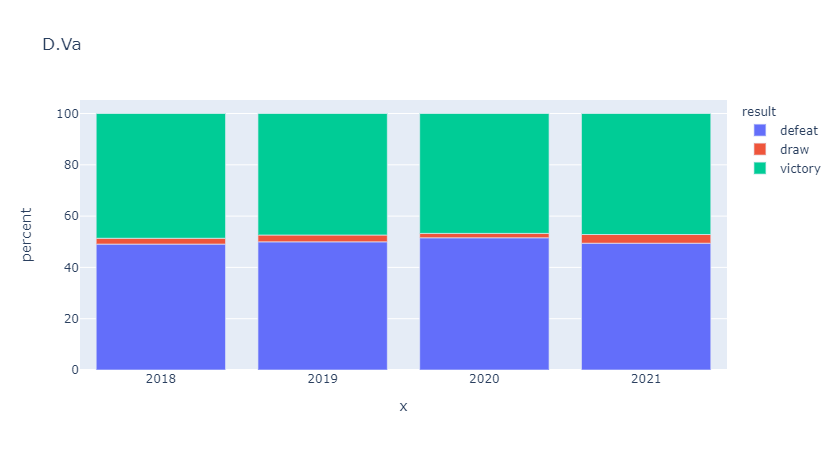

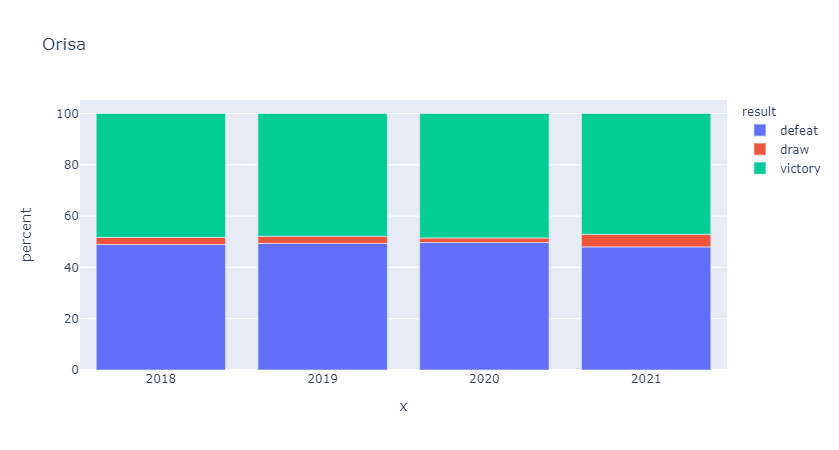

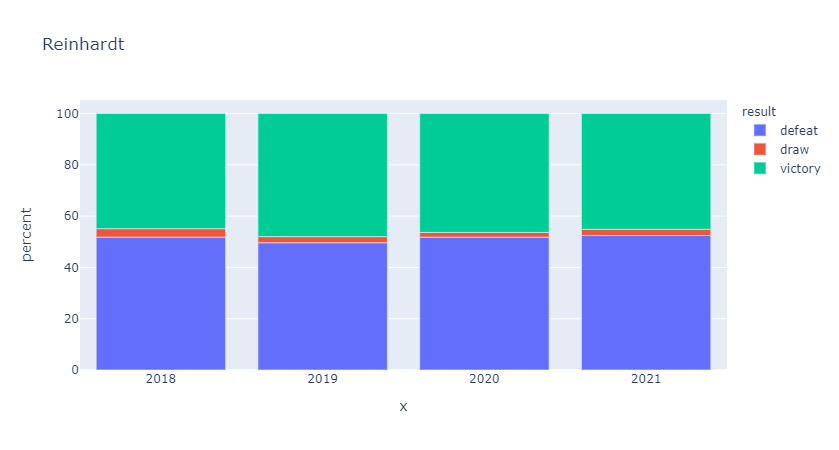

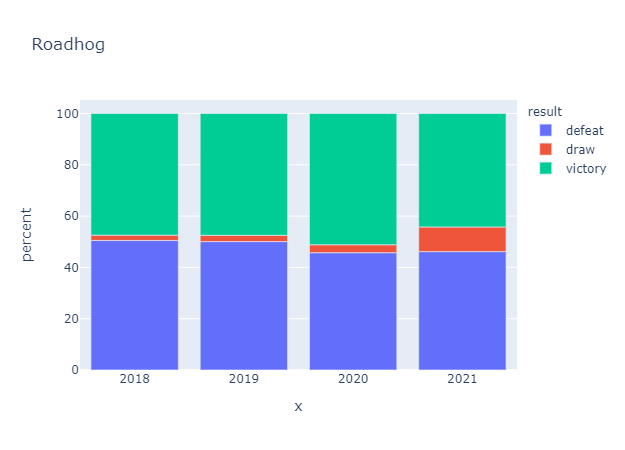

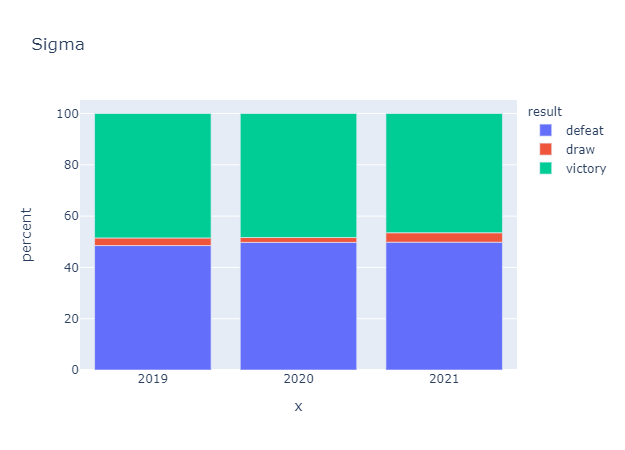

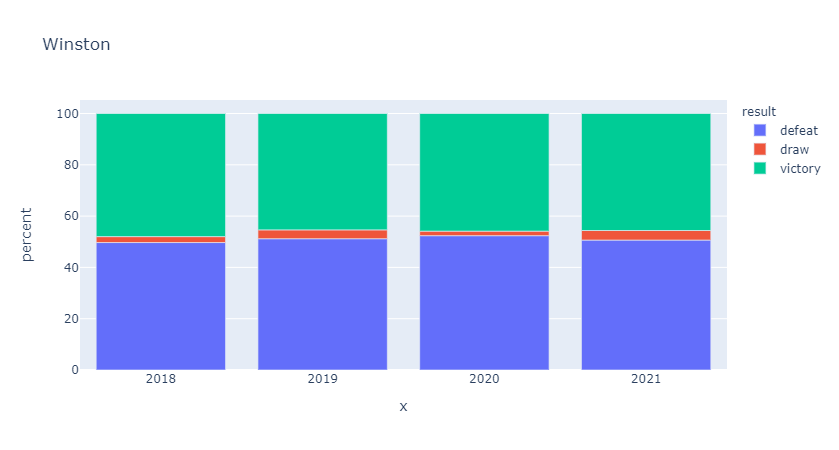

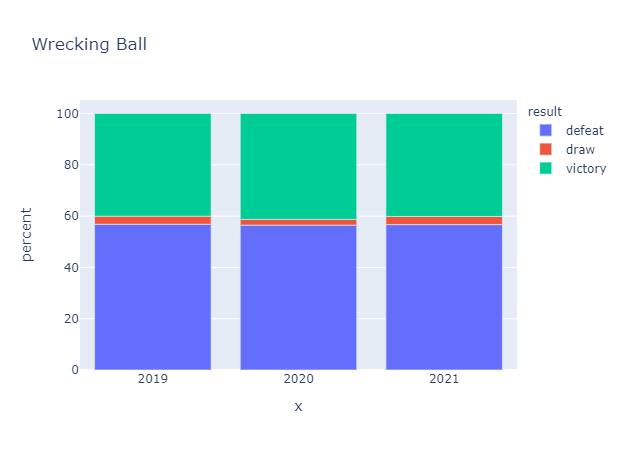

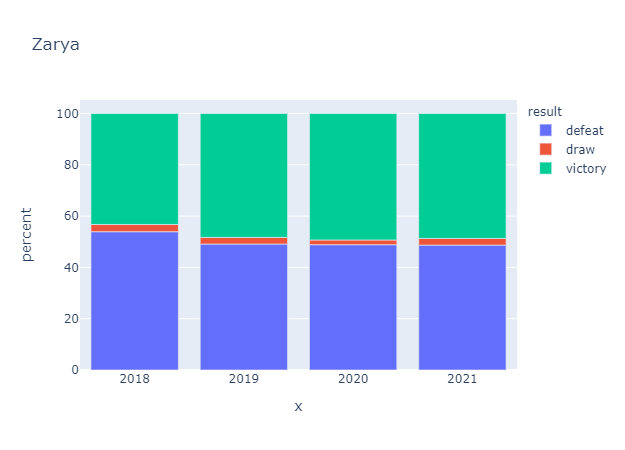

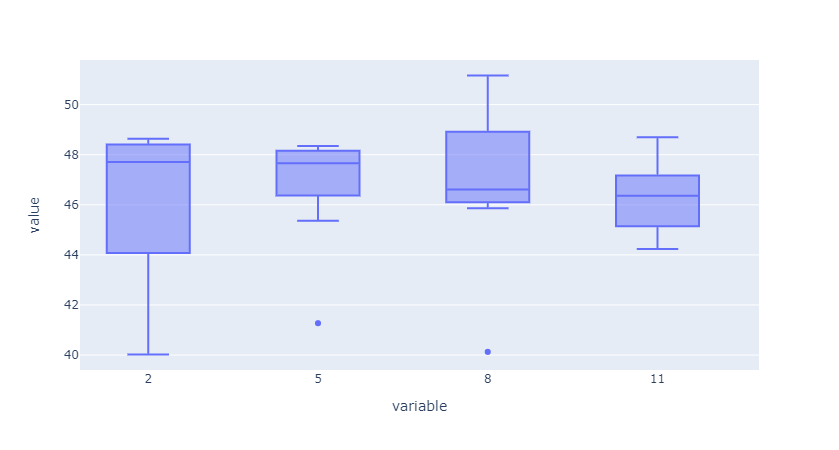

([<matplotlib.axis.XTick at 0x7fc6fdd44be0>,
 [Text(1, 0, 'D.Va'),
  Text(2, 0, 'Orisa'),
  Text(3, 0, 'Reinhardt'),
  Text(4, 0, 'Roadhog'),
  Text(5, 0, 'Sigma'),
  Text(6, 0, 'Winston'),
  Text(7, 0, 'Wrecking Ball'),
  Text(8, 0, 'Zarya')])

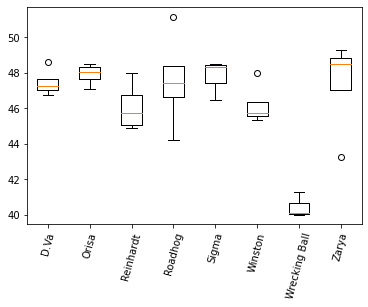

In [462]:
tank=["D.Va", "Orisa", "Reinhardt", "Roadhog", "Sigma", "Winston", "Wrecking Ball", "Zarya"]
dps=["Ashe", "Bastion", "Doomfist", "Echo", "Genji", "Hanzo", "Junkrat", "McCree", "Mei", "Pharah", "Reaper", "Soldier: 76", "Sombra", "Symmetra", "Torbjörn", "Tracer", "Widowmaker"]
healer=["Ana", "Baptiste", "Brigitte", "Lúcio", "Mercy","Moira", "Zenyatta"]
win_rate=[]
for i in tank:
    check=hero_mapresult.hero.apply(lambda x: i in x)
    percentage=hero_mapresult[check==True].groupby([hero_mapresult.start_time.dt.to_period("Y"),"result"]).result.count()*100/c[check==True].groupby(hero_mapresult.start_time.dt.to_period("Y")).result.count()
    table=percentage.to_frame().rename(columns={"result": "percent"}).reset_index()
    win=table[table.result=="victory"].percent
    win_rate.append(win)
    fig=px.bar(table, x=table.start_time.astype(str), y="percent", color="result", title=i)
    fig.show()

# fig1=px.box(win_rate)    
# fig1.show()

import matplotlib as mpl
import matplotlib.pyplot as plt
fig, ax= plt.subplots()
bp=ax.boxplot(win_rate)
plt.xticks([1,2,3,4,5,6,7,8],["D.Va", "Orisa", "Reinhardt", "Roadhog", "Sigma", "Winston", "Wrecking Ball", "Zarya"], rotation=75)


# for i in dps:
#     check=c.hero.apply(lambda x: i in x)
#     percentage=c[check==True].groupby([c.start_time.dt.to_period("Y"),"result"]).result.count()*100/c[check==True].groupby(c.start_time.dt.to_period("Y")).result.count()
#     table=percentage.to_frame().rename(columns={"result": "percent"}).reset_index()
#     fig=px.bar(table, x=table.start_time.astype(str), y="percent", color="result", title=i)
#     fig.show()
    
# for i in dps:
#     check=c.hero.apply(lambda x: i in x)
#     percentage=c[check==True].groupby([c.start_time.dt.to_period("Y"),"result"]).result.count()*100/c[check==True].groupby(c.start_time.dt.to_period("Y")).result.count()
#     table=percentage.to_frame().rename(columns={"result": "percent"}).reset_index()
#     fig=px.bar(table, x=table.start_time.astype(str), y="percent", color="result", title=i)
#     fig.show()